### Reading List

* Book: [Bayesian Modelling and Computation in Python](https://bayesiancomputationbook.com/welcome.html)
* [Notebook](https://github.com/BayesianModelingandComputationInPython/BookCode_Edition1/tree/main/notebooks_updated) for the above book
* [Discussion](https://compcogsci-3016.djnavarro.net/technote_betabinomial.pdf) on the Beta-Binomial Model
* [Some more reading](https://www.statisticshowto.com/beta-binomial-distribution/) on the Beta-Binomial distribution
* PyPi page: [PyMC](https://pypi.org/project/pymc/)
* [Gaussian Process Summer School, 2015](https://gpss.cc/gpss15/)
* [Slides](https://gpss.cc/gpss15/talks/KernelDesign.pdf) on kernel design
* Duke University: Spatio-Temporal Modeling [home page](https://www2.stat.duke.edu/~cr173/Sta444_Sp18/)
* [Lecture 14](https://www2.stat.duke.edu/~cr173/Sta444_Sp18/slides/Lec14/Lec14.pdf) on covariance functions from the above
* Cambridge: [Covariance functions](https://mlg.eng.cam.ac.uk/teaching/4f13/2324/covariance%20functions.pdf) (author of GPML)
* A [Kernel Cookbook](https://www.digilab.co.uk/posts/the-kernel-cookbook)
* Wikipedia: [Factor analysis](https://en.wikipedia.org/wiki/Factor_analysis)
* Wikipedia: [Latent and observable variables](https://en.wikipedia.org/wiki/Latent_and_observable_variables)
* [PyMC Learn](https://www.pymc.io/projects/docs/en/stable/learn.html)
* [PyMC Example Gallery](https://www.pymc.io/projects/examples/en/latest/gallery.html)
* UIowa: [Some special distributions](https://myweb.uiowa.edu/boxwang/files/Chapter3.pdf)
* CMU: [Matrix calculus](https://www.cs.cmu.edu/~mgormley/courses/10601/slides/10601-matrix-calculus.pdf)

### Installations

In [1]:
# !python -m pip uninstall theano --yes

In [2]:
# pip install --upgrade theano

In [3]:
# pip show pymc

In [4]:
# import pymc as pm

In [5]:
# pip show pytensor

In [6]:
# pip install theano

In [7]:
# pip install pymc3

In [8]:
# pip install --upgrade pymc3 theano

In [9]:
# pip show pymc3

In [10]:
# !python -m pip uninstall pymc3 --yes

In [11]:
# pip install pymc

In [12]:
# pip install graphviz

In [13]:
# pip install --upgrade ipywidgets

### Importing

In [131]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
import pymc as pm
import graphviz
from scipy.optimize import minimize
from scipy.stats import entropy
import ipywidgets as ipyw
from ipywidgets import interact
az.style.use("arviz-darkgrid")
np.random.seed(521)

In [15]:
viridish = [(0.2823529411764706, 0.11372549019607843, 0.43529411764705883, 1.0),
            (0.1450980392156863, 0.6705882352941176, 0.5098039215686274, 1.0),
            (0.6901960784313725, 0.8666666666666667, 0.1843137254901961, 1.0)]

### 1.2. A DIY Sampler, Do Not Try This at Home

In [16]:
a = 2
b = 2
th = 0.5
stats.beta(a, b).pdf(th)

1.5000000000000007

In [17]:
-np.inf > 0

False

In [18]:
# th = θ, a = α, b = β
def post(th, Y, a = 1, b = 1):
    if 0 <= th <= 1:
        prior = stats.beta(a, b).pdf(th) # value of prior at given theta
        like = stats.bernoulli(th).pmf(Y).prod() # likelihood calculated using given theta and the given data
        prob = like * prior # posterior value for that theta
    else:
        prob = -np.inf # saying fuck off?
        # yeah if theta ever goes outside the support of the beta distribution ([0, 1]) then the ratio will be -inf, and so it won't get accepted
        # as the next theta.
    return prob

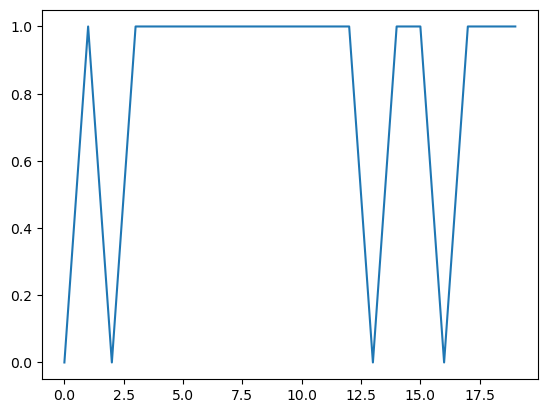

In [19]:
Y = stats.bernoulli(0.7).rvs(20)
successes = sum(Y)
n = len(Y)
plt.plot(Y)

In [20]:
stats.bernoulli(0.7).pmf(Y).prod()

2.6918673761376794e-05

In [21]:
sum(Y), len(Y)

(16, 20)

In [22]:
n_iters = 5000 # no. of samples of mcmc
can_sd = 0.05 # proposal distribution sd
a = b = 1 # prior parameters
th = 0.5 # starting theta for mcmc, our prior is on theta
trace = {"th": np.zeros(n_iters)}
p2 = post(th, Y, a, b) # posterior value using theta = 0.5

In [23]:
stats.norm(th, can_sd).rvs(1)[0]

0.5259722127943603

In [24]:
for iter in range(n_iters): # mcmc samples
    th_can = stats.norm(th, can_sd).rvs(1)[0] # the new theta is sampled from the proposal distribution
    p1 = post(th_can, Y, a, b) # the posterior value for this theta
    pa = p1 / p2 # ratio of two posteriors
    if pa > stats.uniform(0, 1).rvs(1)[0]: # if pa > 1, then it gets accepted anyway. otherwise, apply the uniform selection thing.
        th = th_can
        p2 = p1
    trace["th"][iter] = th

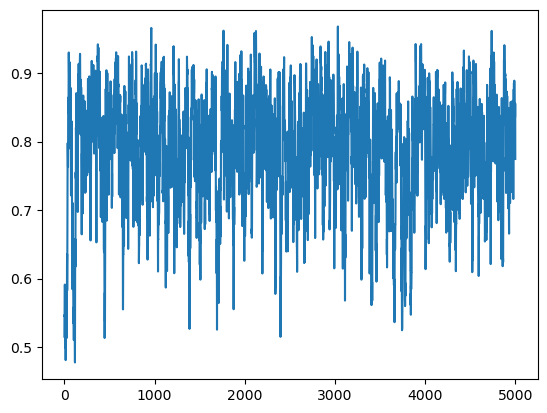

In [25]:
plt.plot(trace['th'])

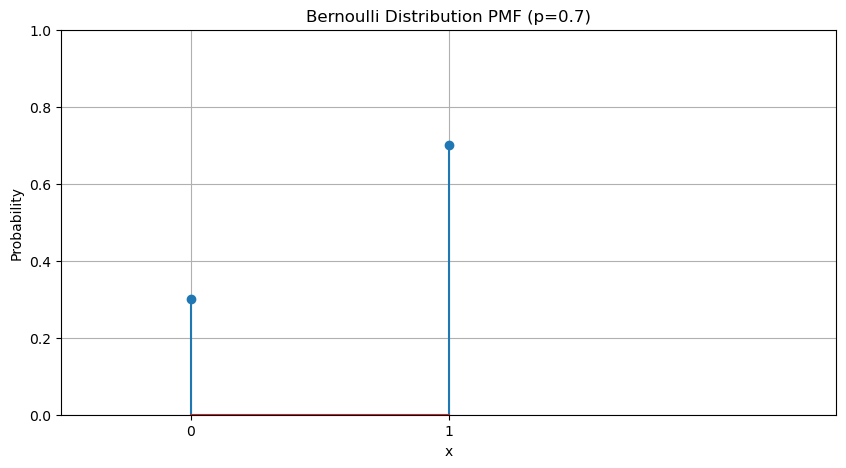

In [26]:
# Parameters for the Bernoulli distribution
p = 0.7
bernoulli_dist = stats.bernoulli(p)

# Possible outcomes for the Bernoulli distribution (0 and 1)
x = np.arange(0, 2)
pmf = bernoulli_dist.pmf(x)

# Plot the PMF
plt.figure(figsize=(10, 5))
plt.stem(x, pmf)
plt.title('Bernoulli Distribution PMF (p=0.7)')
plt.xlabel('x')
plt.ylabel('Probability')
plt.xticks(x)
plt.xlim(-0.5, 2.5)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

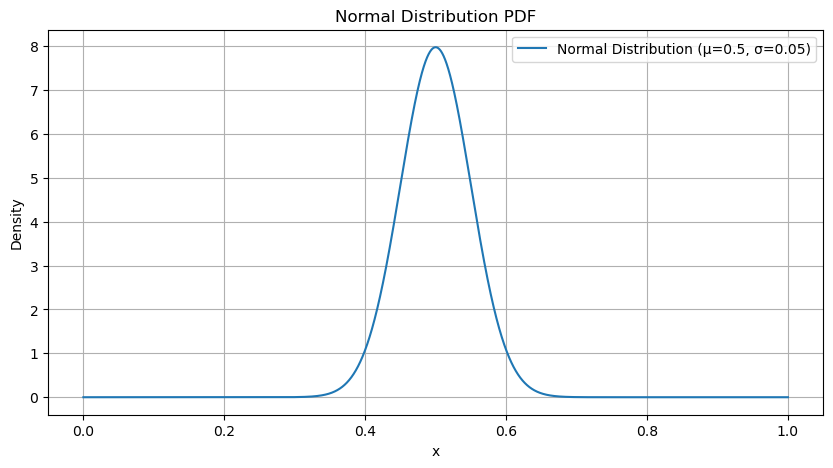

In [27]:
# Parameters for the Normal distribution
mu = 0.5
sigma = can_sd
normal_dist = stats.norm(mu, sigma)

# Generate values from -3*sigma to 3*sigma
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
x = np.linspace(0, 1, 5000)
pdf = normal_dist.pdf(x)

# Plot the PDF
plt.figure(figsize=(10, 5))
plt.plot(x, pdf, label=f'Normal Distribution (μ={mu}, σ={sigma})')
plt.title('Normal Distribution PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

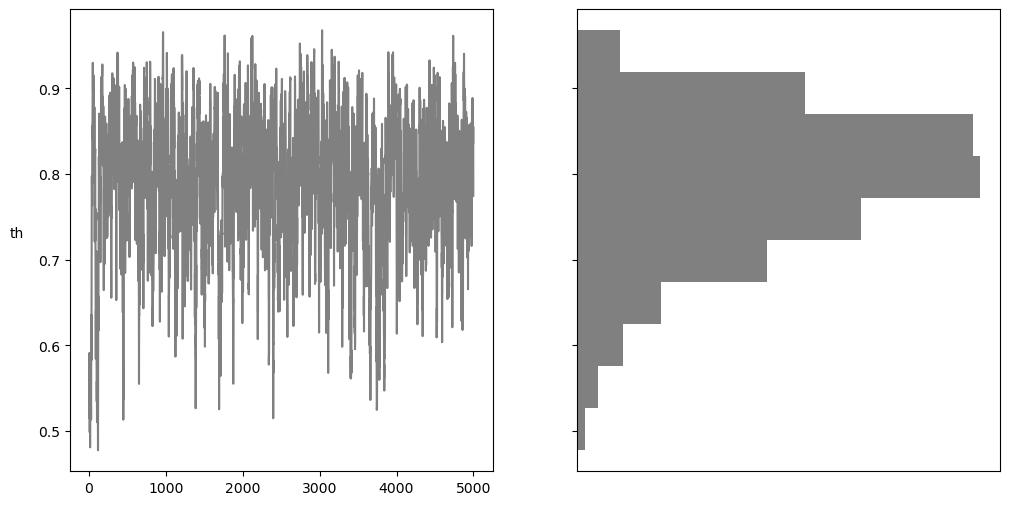

In [28]:
_, axes = plt.subplots(1, 2, sharey = True, figsize = (12, 6))
axes[0].plot(trace['th'], '0.5')
axes[0].set_ylabel('th', rotation = 0, labelpad = 15)
axes[1].hist(trace['th'], color = '0.5', orientation = 'horizontal', density = True)
axes[1].set_xticks([])
plt.show()

In [29]:
az.summary(trace, kind = "stats", round_to = 2)

,mean,sd,hdi_3%,hdi_97%
th,0.79,0.08,0.63,0.93


C:\Users\aniru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


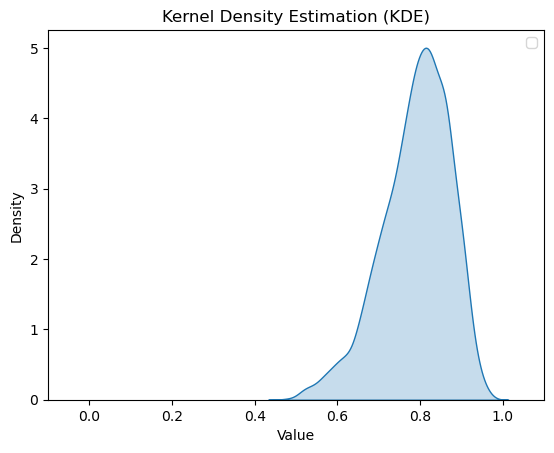

In [30]:
# Plotting KDE with Seaborn
sns.kdeplot(trace['th'], fill=True)
plt.title('Kernel Density Estimation (KDE)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(-0.1, 1.1)
# x_value = idata.posterior['th'].mean()
# plt.axvline(x=x_value, color='red', linestyle='--', linewidth=2, label=f'x={x_value}')
plt.legend()
plt.show()

In [31]:
a, b

(1, 1)

C:\Users\aniru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


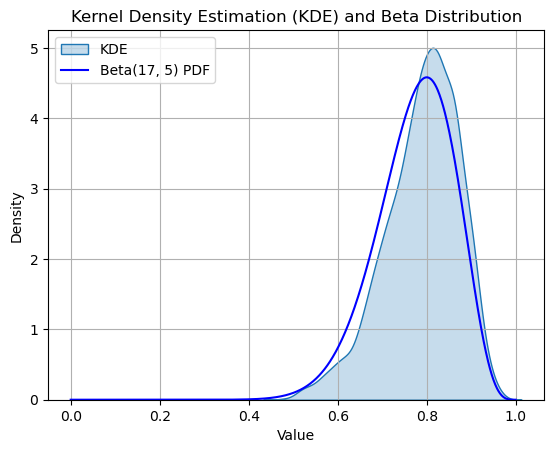

In [32]:
# Plotting KDE with Seaborn
sns.kdeplot(trace['th'], fill = True, label = 'KDE') # Plot KDE of the sample data
plt.title('Kernel Density Estimation (KDE) and Beta Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

# Parameters for the Beta distribution
alpha = a + successes
beta = b + n - successes

# Generate values for x from 0 to 1
x = np.linspace(0, 1, 1000)

# Calculate the PDF of the Beta distribution for each x
pdf = stats.beta.pdf(x, alpha, beta)

# Plot the Beta distribution PDF
plt.plot(x, pdf, 'b-', label=f'Beta({alpha}, {beta}) PDF')

# Add legend, labels, and grid
plt.legend()
plt.grid(True)
plt.show()

<Axes: title={'center': 'th'}>

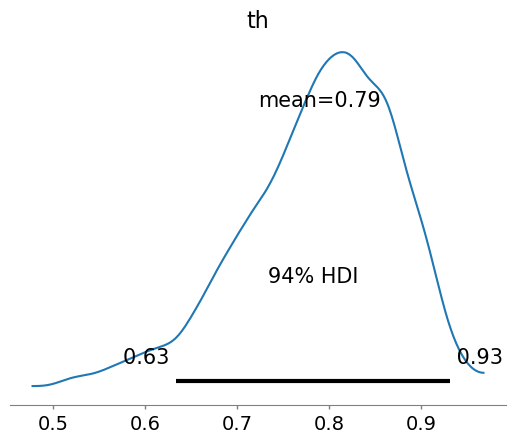

In [33]:
az.plot_posterior(trace)

### 1.3. Say Yes to Automating Inference, Say No to Automated Model Building

In [34]:
with pm.Model() as model:
    th = pm.Beta("th", alpha = 1, beta = 1)
    y_obs = pm.Binomial("y_obs", n = 1, p = th, observed = Y)
    idata = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [th]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 49 seconds.


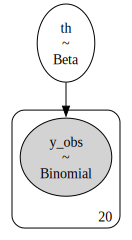

In [35]:
pm.model_to_graphviz(model)

In [36]:
# import os
# os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

In [37]:
idata.posterior['th']

<xarray.DataArray 'th' (chain: 4, draw: 1000)>
array([[0.81021076, 0.84771939, 0.59356881, ..., 0.84821269, 0.79047931,
        0.77148564],
       [0.85975681, 0.85538548, 0.87748486, ..., 0.59465128, 0.78357625,
        0.62579206],
       [0.66500689, 0.78224068, 0.78224068, ..., 0.7304356 , 0.68941398,
        0.83580588],
       [0.91636936, 0.70643086, 0.8229967 , ..., 0.67344305, 0.68189773,
        0.65118995]])
Coordinates:
  * chain    (chain) int32 0 1 2 3
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

In [38]:
pred_dists = (pm.sample_prior_predictive(1000, model).prior_predictive['y_obs'].values,
              pm.sample_posterior_predictive(idata, model).posterior_predictive['y_obs'].values)

Sampling: [th, y_obs]
Sampling: [y_obs]


Output()

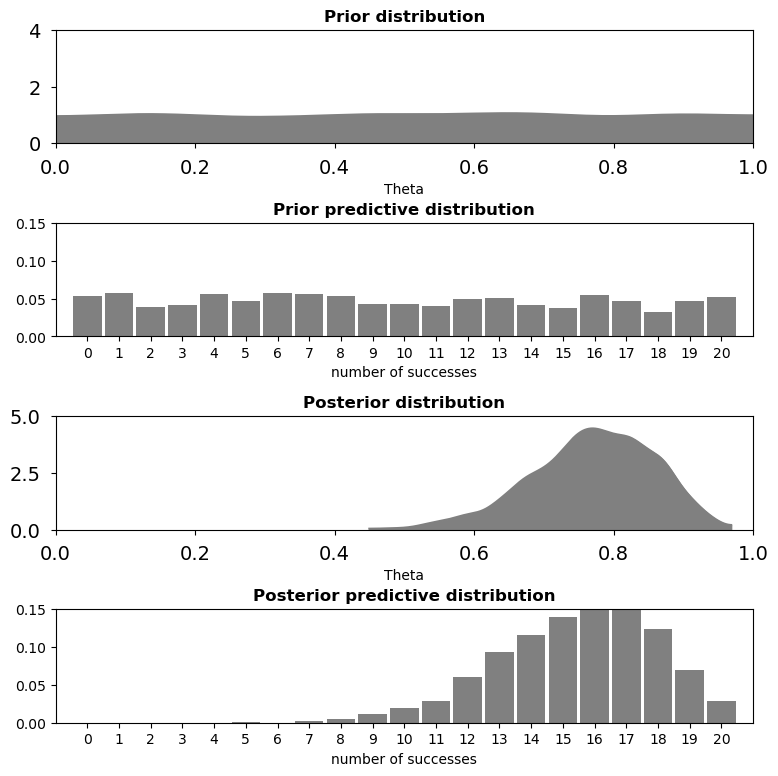

In [39]:
fig, axes = plt.subplots(4, 1, figsize = (9, 9))

fig.subplots_adjust(hspace=0.7)  # Adjust the value as needed

for idx, n_d, dist in zip((1, 3), ("Prior", "Posterior"), pred_dists):
    az.plot_dist(dist.sum(-1), hist_kwargs = {"color": "0.5", "bins": range(0, 22)}, ax = axes[idx])
    axes[idx].set_title(f"{n_d} predictive distribution", fontweight = 'bold')
    axes[idx].set_xlim(-1, 21)
    axes[idx].set_ylim(0, 0.15)
    axes[idx].set_xlabel("number of successes")

az.plot_dist(pm.draw(th, 1000), plot_kwargs = {"color": "0.5"}, fill_kwargs = {"alpha": 1}, ax = axes[0])
axes[0].set_title("Prior distribution", fontweight = 'bold')
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 4)
axes[0].tick_params(axis = 'both', pad = 7)
axes[0].set_xlabel("Theta")

az.plot_dist(idata.posterior["th"], plot_kwargs = {"color": "0.5"}, fill_kwargs = {"alpha": 1}, ax = axes[2])
axes[2].set_title("Posterior distribution", fontweight = 'bold')
axes[2].set_xlim(0, 1)
axes[2].set_ylim(0, 5)
axes[2].tick_params(axis = 'both', pad = 7)
axes[2].set_xlabel("Theta")

plt.show()

In [40]:
# posterior mean is a black box

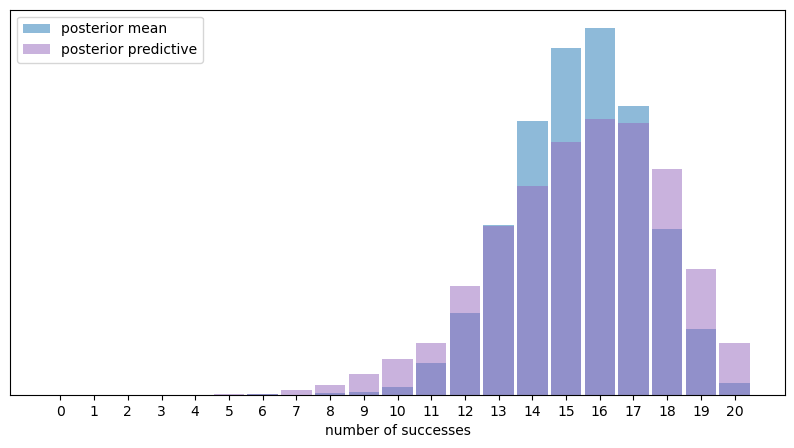

In [41]:
predictions = (stats.binom(n = 1, p = idata.posterior['th'].mean()).rvs((4000, len(Y))),
               pred_dists[1])

for d, c, l in zip(predictions, ("C0", "C4"), ("posterior mean", "posterior predictive")):
    ax = az.plot_dist(d.sum(-1), label = l, figsize = (10, 5), hist_kwargs = {"alpha": 0.5, "color": c, "bins": range(0, 22)})
    ax.set_yticks([])
    ax.set_xlabel("number of successes")
plt.show()

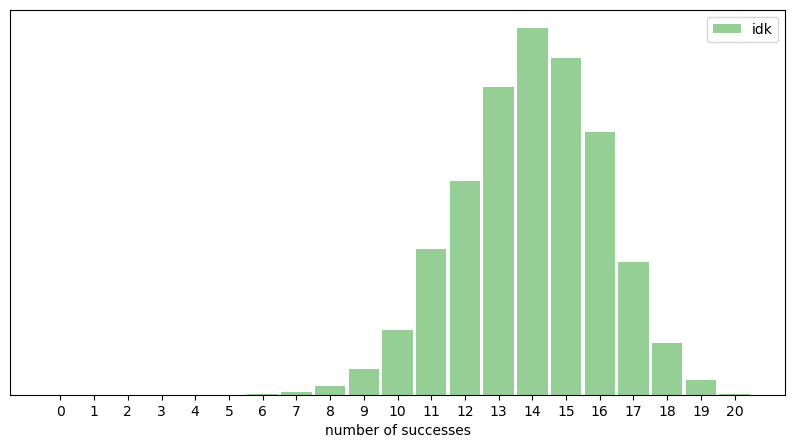

In [42]:
obj = stats.bernoulli(p = 0.7).rvs((4000, len(Y)))

ax = az.plot_dist(obj.sum(-1), label = "idk", figsize = (10, 5), hist_kwargs = {"alpha": 0.5, "color": "C2", "bins": range(0, 22)})
ax.set_yticks([])
ax.set_xlabel("number of successes")
plt.show()

In [43]:
o = np.ones((2, 3, 4))
o

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [44]:
o.sum(-1)

array([[4., 4., 4.],
       [4., 4., 4.]])

In [45]:
obj

array([[1, 0, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 0, 1],
       ...,
       [1, 0, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

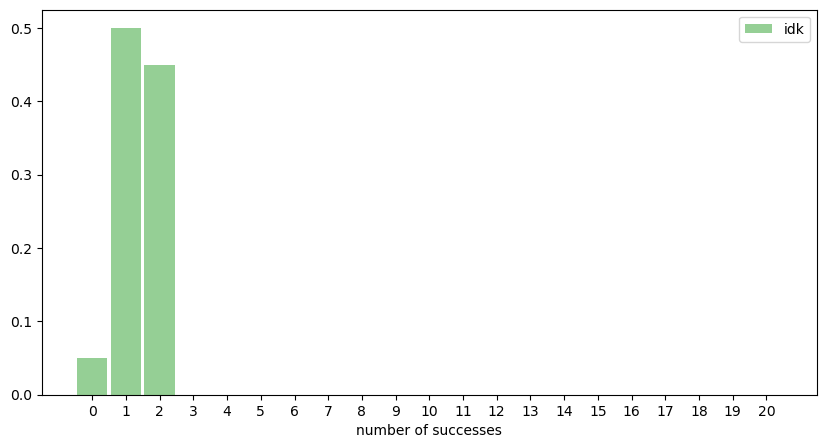

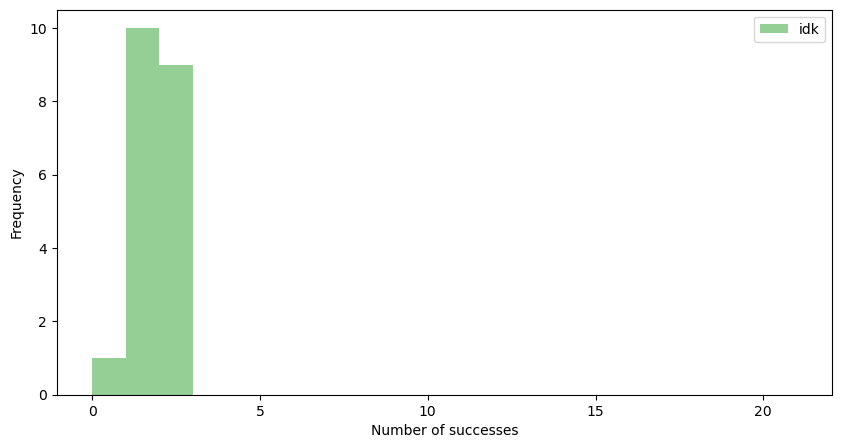

In [46]:
obj = stats.bernoulli(p = 0.7).rvs((20, 2))
# rvs((arg1, arg2)): arg1 samples of arg2 trials each
# (20, 2): in 1 sample, we have 2 coin flips. this happens 20 times.
ax = az.plot_dist(obj.sum(-1), label = "idk", figsize = (10, 5), hist_kwargs = {"alpha": 0.5, "color": "C2", "bins": range(0, 22)})
# ax.set_yticks([])
ax.set_xlabel("number of successes")
plt.show()

# Plot frequencies using plt.hist
plt.figure(figsize=(10, 5))
plt.hist(obj.sum(-1), bins=range(0, 22), alpha=0.5, color='C2', label='idk')
plt.xlabel('Number of successes')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [47]:
obj

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 0]], dtype=int64)

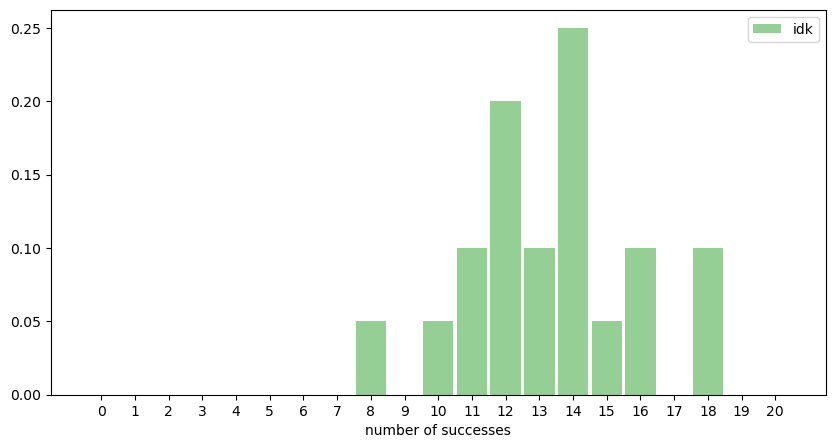

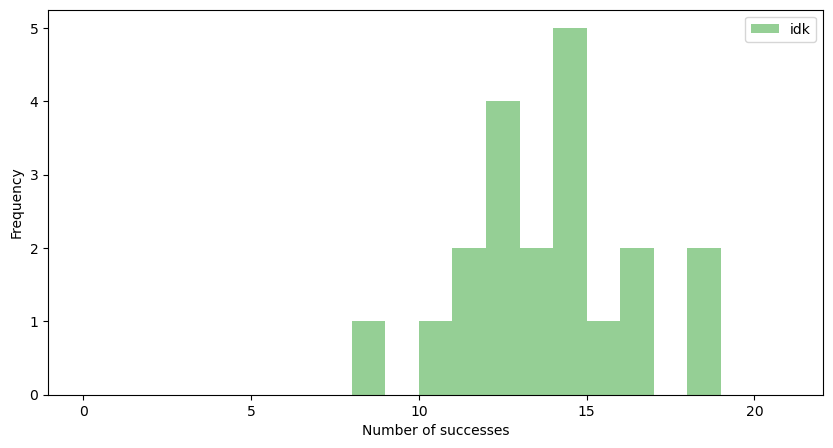

In [48]:
obj = stats.binom(n = 2, p = 0.7).rvs((20, 10))
# binom(n = 1) = bernoulli
# n = 2: 1 trial consists of seeing how many out of 2 coin tosses per trial are positive. each sample has 2 such trials.
ax = az.plot_dist(obj.sum(-1), label = "idk", figsize = (10, 5), hist_kwargs = {"alpha": 0.5, "color": "C2", "bins": range(0, 22)})
# ax.set_yticks([])
ax.set_xlabel("number of successes")
plt.show()

# Plot frequencies using plt.hist
plt.figure(figsize=(10, 5))
plt.hist(obj.sum(-1), bins=range(0, 22), alpha=0.5, color='C2', label='idk')
plt.xlabel('Number of successes')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### 1.4. A Few Options to Quantify Your Prior Information


a_prior + y = 0.5, b_prior + N - y = 0.5
a_prior + y = 1, b_prior + N - y = 1
a_prior + y = 10, b_prior + N - y = 10

a_prior + y = 1.5, b_prior + N - y = 0.5
a_prior + y = 2, b_prior + N - y = 1
a_prior + y = 11, b_prior + N - y = 10

a_prior + y = 1.5, b_prior + N - y = 1.5
a_prior + y = 2, b_prior + N - y = 2
a_prior + y = 11, b_prior + N - y = 11

a_prior + y = 1.5, b_prior + N - y = 2.5
a_prior + y = 2, b_prior + N - y = 3
a_prior + y = 11, b_prior + N - y = 12

a_prior + y = 6.5, b_prior + N - y = 6.5
a_prior + y = 7, b_prior + N - y = 7
a_prior + y = 16, b_prior + N - y = 16

a_prior + y = 59.5, b_prior + N - y = 121.5
a_prior + y = 60, b_prior + N - y = 122
a_prior + y = 69, b_prior + N - y = 131



C:\Users\aniru\AppData\Local\Temp\ipykernel_12224\538419569.py:19: RuntimeWarning: invalid value encountered in divide
  axes[idx].plot(np.divide(y, N), 0, color = "k", marker = "o", ms = 12)


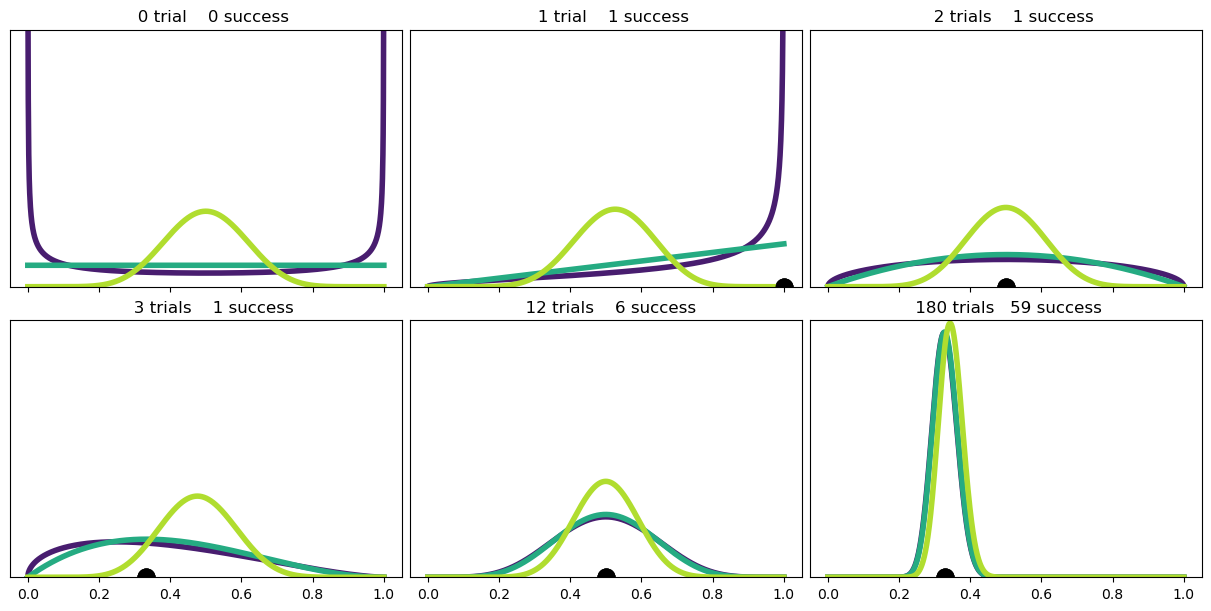

In [49]:
_, axes = plt.subplots(2, 3, figsize = (12, 6), sharey = True, sharex = True, constrained_layout = True)
axes = np.ravel(axes)

n_trials = [0, 1, 2, 3, 12, 180]
success = [0, 1, 1, 1, 6, 59]
data = zip(n_trials, success)

beta_params = [(0.5, 0.5), (1, 1), (10, 10)]
th = np.linspace(0, 1, 1500)
for idx, (N, y) in enumerate(data):
    s_n = ("s" if (N > 1) else "")
    for jdx, (a_prior, b_prior) in enumerate(beta_params):
        p_theta_given_y = stats.beta.pdf(th, a_prior + y, b_prior + N - y)
        print(f"a_prior + y = {a_prior + y}, b_prior + N - y = {b_prior + N - y}")

        axes[idx].plot(th, p_theta_given_y, lw = 4, color = viridish[jdx])
        axes[idx].set_yticks([])
        axes[idx].set_ylim(0, 12)
        axes[idx].plot(np.divide(y, N), 0, color = "k", marker = "o", ms = 12)
        axes[idx].set_title(f"{N: 4d} trial{s_n} {y: 4d} success")
    print()

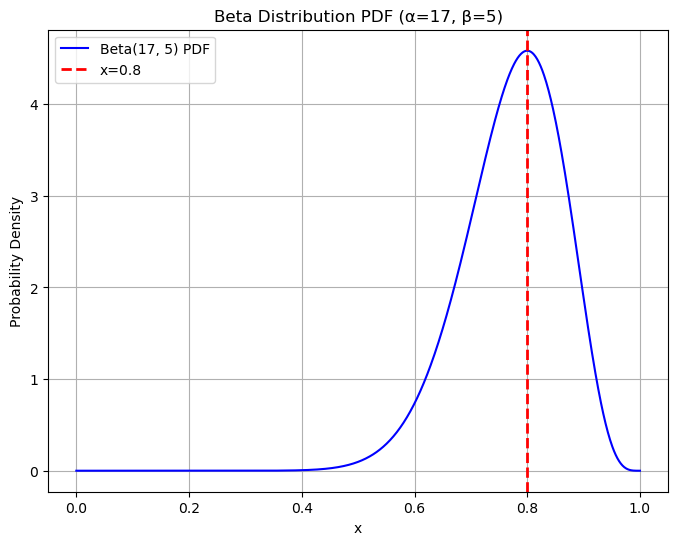

In [50]:
# Parameters for the Beta distribution
alpha = a + sum(Y)
beta = b + n - sum(Y)

# Generate values for x from 0 to 1
x = np.linspace(0, 1, 1000)

# Calculate the PDF of the Beta distribution for each x
pdf = stats.beta.pdf(x, alpha, beta)

# Plot the PDF
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, 'b-', label=f'Beta({alpha}, {beta}) PDF')
x_value = (a + sum(Y) - 1)/(a + b + n - 2)
plt.axvline(x=x_value, color='red', linestyle='--', linewidth=2, label=f'x={x_value}')

# Add labels and title
plt.title(f'Beta Distribution PDF (α={alpha}, β={beta})')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

C:\Users\aniru\AppData\Local\Temp\ipykernel_12224\162969005.py:2: RuntimeWarning: divide by zero encountered in divide
  k = th/(1 - th)
C:\Users\aniru\AppData\Local\Temp\ipykernel_12224\162969005.py:9: RuntimeWarning: divide by zero encountered in power
  axes[0, 0].plot(th, th**(-0.5) * (1-th)**(-0.5))
C:\Users\aniru\AppData\Local\Temp\ipykernel_12224\162969005.py:14: RuntimeWarning: divide by zero encountered in power
  axes[0, 1].plot(k, k**(-0.5) * (1+k)**(-1))
C:\Users\aniru\AppData\Local\Temp\ipykernel_12224\162969005.py:16: RuntimeWarning: invalid value encountered in multiply
  axes[1, 1].plot(k, k**(y-0.5) * (1+k)**(-n-1))
C:\Users\aniru\AppData\Local\Temp\ipykernel_12224\162969005.py:24: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
C:\Users\aniru\AppData\Local\Temp\ipykernel_12224\162969005.py:25: UserWarning: The figure layout h

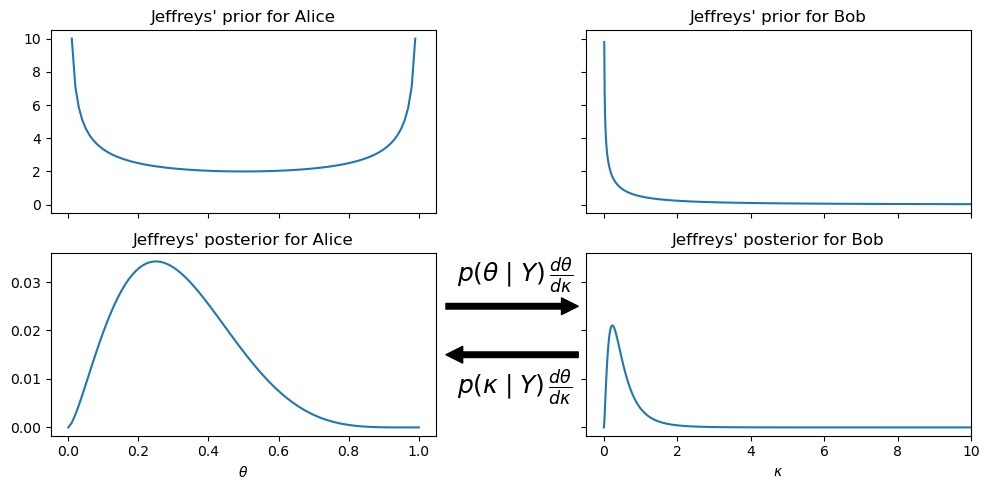

In [51]:
th = np.linspace(0, 1, 100)
k = th/(1 - th)
y = 2
n = 7

_, axes = plt.subplots(2, 2, figsize = (10, 5), sharex = 'col', sharey = 'row', constrained_layout = True)

axes[0, 0].set_title("Jeffreys' prior for Alice")
axes[0, 0].plot(th, th**(-0.5) * (1-th)**(-0.5))
axes[1, 0].set_title("Jeffreys' posterior for Alice")
axes[1, 0].plot(th, th**(y-0.5) * (1-th)**(n-y-0.5))
axes[1, 0].set_xlabel(r"$\theta$")
axes[0, 1].set_title("Jeffreys' prior for Bob")
axes[0, 1].plot(k, k**(-0.5) * (1+k)**(-1))
axes[1, 1].set_title("Jeffreys' posterior for Bob")
axes[1, 1].plot(k, k**(y-0.5) * (1+k)**(-n-1))
axes[1, 1].set_xlim(-0.5, 10)
axes[1, 1].set_xlabel("$\kappa$")
axes[1, 1].text(-4.0, 0.030, size = 18, s = r'$p(\theta \mid Y) \, \frac{d\theta}{d\kappa}$')
axes[1, 1].annotate("", xy = (-0.5, 0.025), xytext = (-4.5, 0.025), arrowprops = dict(facecolor = 'black', shrink = 0.05))
axes[1, 1].text(-4.0, 0.007, size = 18, s = r'$p(\kappa \mid Y) \, \frac{d\theta}{d\kappa}$')
axes[1, 1].annotate("", xy = (-4.5, 0.015), xytext = (-0.5, 0.015), arrowprops = dict(facecolor = 'black', shrink = 0.05), annotation_clip = False)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
plt.tight_layout()

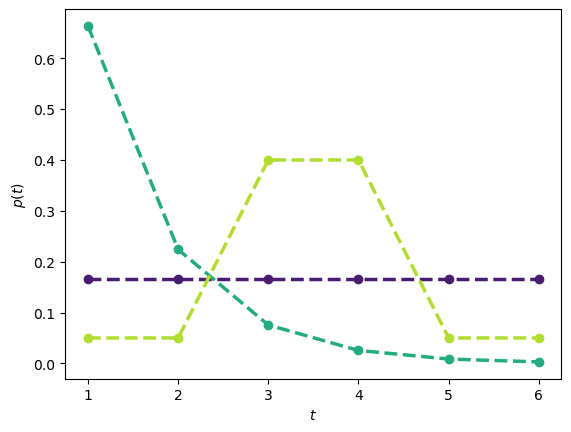

In [52]:
cons = [[{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}],
        [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
         {'type': 'eq', 'fun': lambda x: 1.5 - np.sum(x * np.arange(1, 7))}],
        [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
         {'type': 'eq', 'fun': lambda x: np.sum(x[[2, 3]]) - 0.8}]]

max_ent = []
for i, c in enumerate(cons):
    val = minimize(lambda x: -entropy(x), x0 = [1/6]*6, bounds = [(0., 1.)] * 6,
                   constraints = c)['x']
    max_ent.append(entropy(val))
    plt.plot(np.arange(1, 7), val, 'o--', color = viridish[i], lw = 2.5)
plt.xlabel("$t$")
plt.ylabel("$p(t)$")
plt.show()

In [53]:
ite = 100_000
entropies = np.zeros((3, ite))
for idx in range(ite):
    rnds = np.zeros(6)
    total = 0
    x_ = np.random.choice(np.arange(1, 7), size = 6, replace = False)
    for i in x_[:-1]:
        rnd = np.random.uniform(0, 1-total)
        rnds[i-1] = rnd
        total = rnds.sum()
    rnds[-1] = 1 - rnds[:-1].sum()
    H = entropy(rnds)
    entropies[0, idx] = H
    if abs(1.5 - np.sum(rnds * x_)) < 0.01:
        entropies[1, idx] = H
    prob_34 = sum(rnds[np.argwhere((x_ == 3) | (x_ == 4)).ravel()])
    if abs(0.8 - prob_34) < 0.01:
        entropies[2, idx] = H

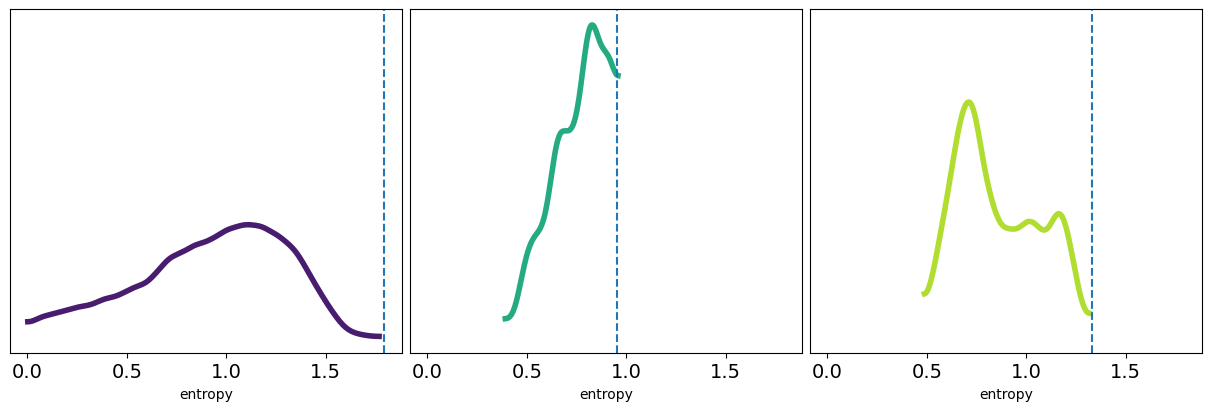

In [54]:
_, ax = plt.subplots(1, 3, figsize = (12, 4), sharex = True, sharey = True, constrained_layout = True)
for i in range(3):
    az.plot_kde(entropies[i][np.nonzero(entropies[i])], ax = ax[i], plot_kwargs = {"color": viridish[i], "lw": 4})
    ax[i].axvline(max_ent[i], 0, 1, ls = "--")
    ax[i].set_yticks([])
    ax[i].set_xlabel("entropy")
plt.show()

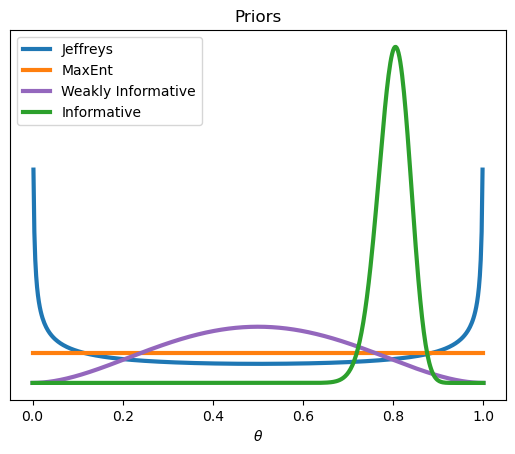

In [55]:
x = np.linspace(0, 1, 500)
params = [(0.5, 0.5), (1, 1), (3, 3), (100, 25)]
labels = ["Jeffreys", "MaxEnt", "Weakly Informative", "Informative"]

_, ax = plt.subplots()
for (a, b), label, c in zip(params, labels, (0, 1, 4, 2)):
    pdf = stats.beta.pdf(x, a, b)
    ax.plot(x, pdf, label = f"{label}", c = f"C{c}", lw = 3)
    ax.set(yticks = [], xlabel = r"$\theta$", title = "Priors")
    ax.legend()
plt.show()

### 1.5 Exercises

#### 1E5

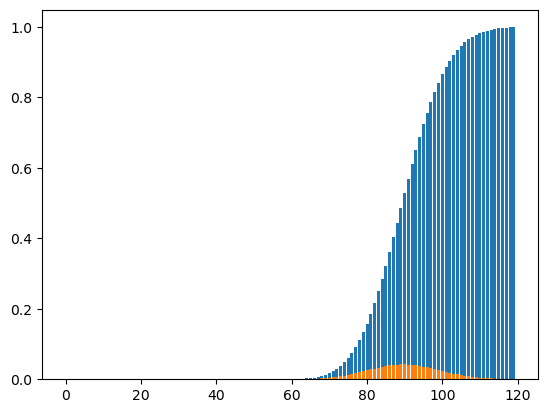

In [56]:
visitors = np.arange(120)
pmf = stats.poisson(90).pmf(visitors)
cdf = stats.poisson(90).cdf(visitors)
plt.bar(visitors, cdf)
plt.bar(visitors, pmf)
# plt.ylim(0, 0.08)
plt.show()

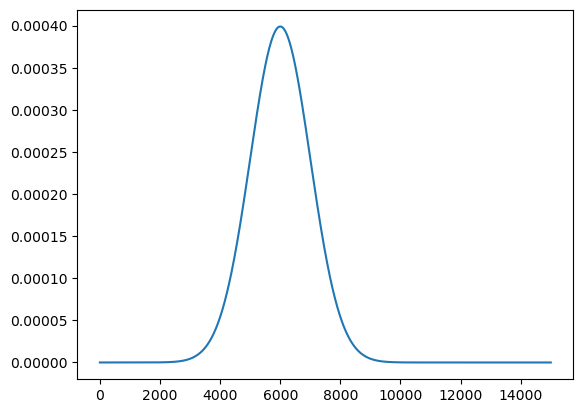

In [57]:
elephant_weights = np.linspace(0, 15000, 1500)

pdf = stats.norm(6000, 1000).pdf(elephant_weights)
plt.plot(elephant_weights, pdf)
# plt.yticks([])
plt.show()

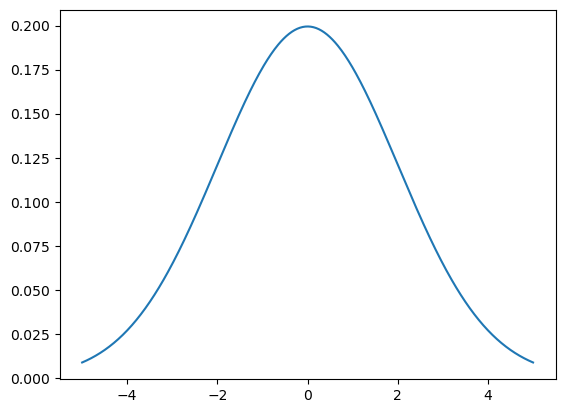

In [58]:
arr = np.linspace(-5, 5, 500)

pdf = stats.norm(0, 2).pdf(arr)
plt.plot(arr, pdf)
# plt.yticks([])
plt.show()

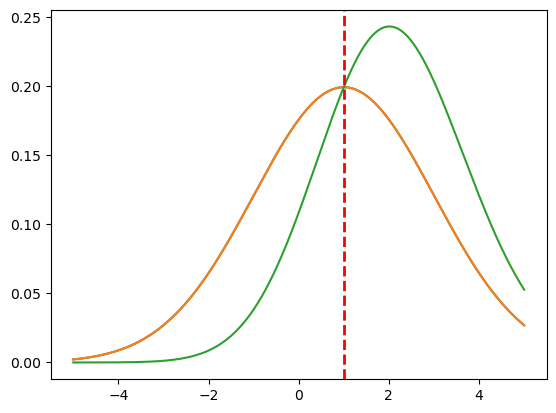

In [59]:
human_weights = np.linspace(-5, 5, num=1000)
# loc=120, scale=30,
pdf1 = stats.skewnorm(loc=1, scale=2, a=0).pdf(human_weights)
pdf2 = stats.norm(1, 2).pdf(human_weights)
pdf3 = stats.skewnorm(loc=1, scale=2, a=1).pdf(human_weights)
plt.plot(human_weights, pdf1)
plt.plot(human_weights, pdf2)
plt.plot(human_weights, pdf3)
plt.axvline(x=1, color='red', linestyle='--', linewidth=2, label=f'x={1}')
# plt.yticks([])
plt.show()

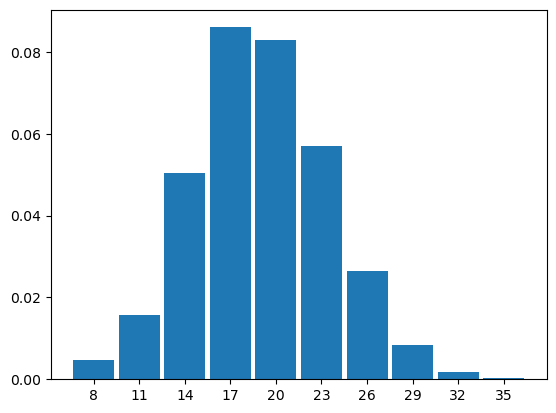

In [60]:
p = stats.poisson(20).rvs(1000)
az.plot_dist(p);

#### 1E7

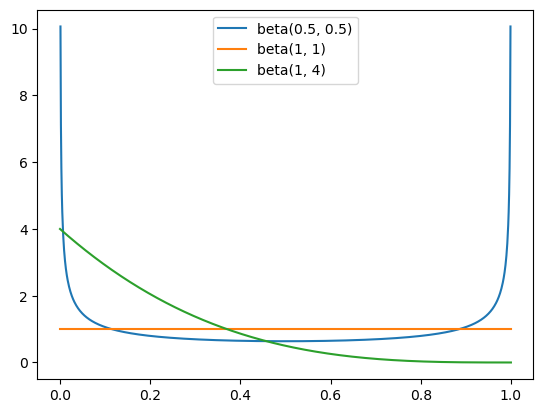

In [61]:
arr = np.linspace(0, 1, 1000)
p1 = stats.beta(0.5, 0.5).pdf(arr)
p2 = stats.beta(1, 1).pdf(arr)
p3 = stats.beta(1, 4).pdf(arr)
plt.plot(arr, p1, label="beta(0.5, 0.5)")
plt.plot(arr, p2, label="beta(1, 1)")
plt.plot(arr, p3, label="beta(1, 4)")
plt.legend(loc = 9)
plt.show()

#### 1E8

C:\Users\aniru\AppData\Local\Temp\ipykernel_12224\1252000158.py:18: RuntimeWarning: invalid value encountered in divide
  axes[idx].plot(np.divide(y, N), 0, color = "k", marker = "o", ms = 12)


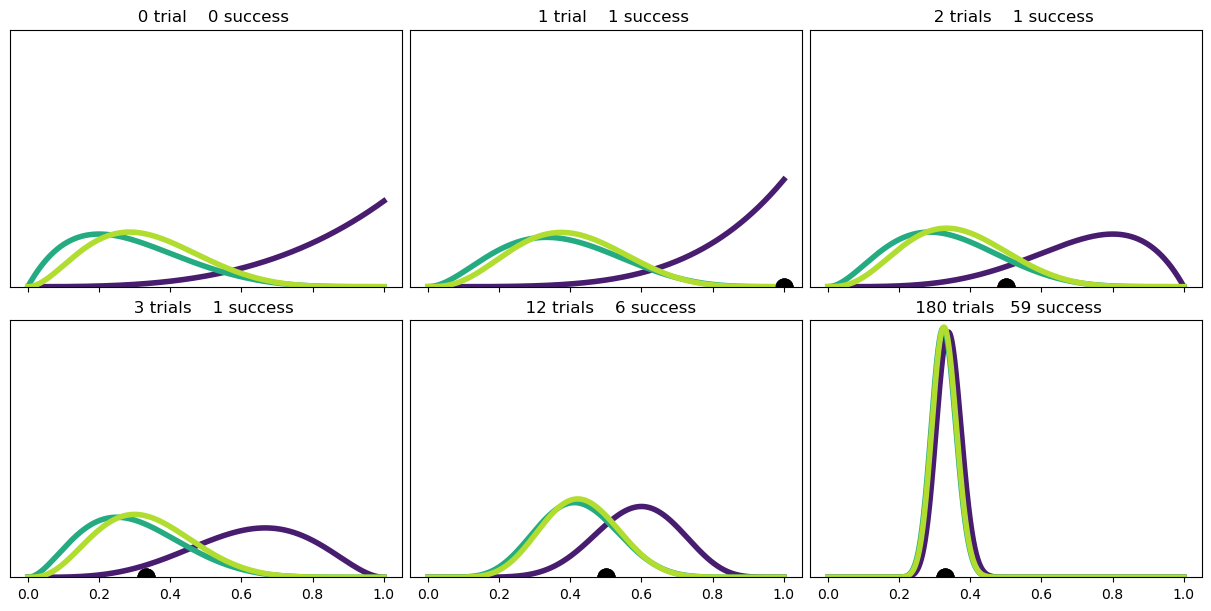

In [62]:
_, axes = plt.subplots(2, 3, figsize = (12, 6), sharey = True, sharex = True, constrained_layout = True)
axes = np.ravel(axes)

n_trials = [0, 1, 2, 3, 12, 180]
success = [0, 1, 1, 1, 6, 59]
data = zip(n_trials, success)

beta_params = [(4, 1), (2, 5), (3, 6)]
th = np.linspace(0, 1, 1500)
for idx, (N, y) in enumerate(data):
    s_n = ("s" if (N > 1) else "")
    for jdx, (a_prior, b_prior) in enumerate(beta_params):
        p_theta_given_y = stats.beta.pdf(th, a_prior + y, b_prior + N - y)

        axes[idx].plot(th, p_theta_given_y, lw = 4, color = viridish[jdx])
        axes[idx].set_yticks([])
        axes[idx].set_ylim(0, 12)
        axes[idx].plot(np.divide(y, N), 0, color = "k", marker = "o", ms = 12)
        axes[idx].set_title(f"{N: 4d} trial{s_n} {y: 4d} success")

#### 1E9

In [63]:
z = [1, 2, 3, 4, 5, 6]
np.median(z)

3.5

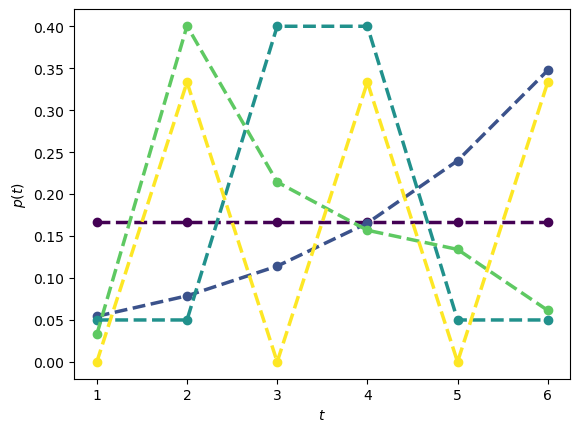

In [64]:
cons = [[{"type": "eq", "fun": lambda x: np.sum(x) - 1}],
        [{"type": "eq", "fun": lambda x: np.sum(x) - 1},
         {"type": "eq", "fun": lambda x: 4.5 - np.sum(x * np.arange(1, 7))}],
        [{"type": "eq", "fun": lambda x: np.sum(x) - 1},
         {"type": "eq", "fun": lambda x: np.sum(x[[2, 3]]) - 0.8}],
        [{"type": "eq", "fun": lambda x: np.sum(x) - 1},
         {"type": "eq", "fun": lambda x: 1-np.sum(x * [-2, 2, 1, 0.5, 0.25, -1])}],
        [{"type": "eq", "fun": lambda x: np.sum(x) - 1},
         {"type": "eq", "fun": lambda x: np.sum(x * [1, 0, 1, 0, 1,0])}]]
# max probability at point x = 3 (mode)
# median at 3
cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(cons)))

max_ent = []
for i, c in enumerate(cons):
    val = minimize(lambda x: -entropy(x), x0=[1/6]*6, bounds=[(0., 1.)] * 6,
                   constraints=c)['x']
    max_ent.append(entropy(val))
    plt.plot(np.arange(1, 7), val, 'o--', color=colors[i], lw=2.5)
plt.xlabel("$t$")
plt.ylabel("$p(t)$")
plt.show()

#### 1E10

In [138]:
# th = θ, a = α, b = β
def post(th, Y, a = 1, b = 1):
    if 0 <= th <= 1:
        prior = stats.beta(a, b).pdf(th) # value of prior at given theta
        like = stats.bernoulli(th).pmf(Y).prod() # likelihood calculated using given theta and the given data
        prob = like * prior # posterior value for that theta
    else:
        prob = -np.inf # saying fuck off?
        # yeah if theta ever goes outside the support of the beta distribution ([0, 1]) then the ratio will be -inf, and so it won't get accepted
        # as the next theta.
    return prob

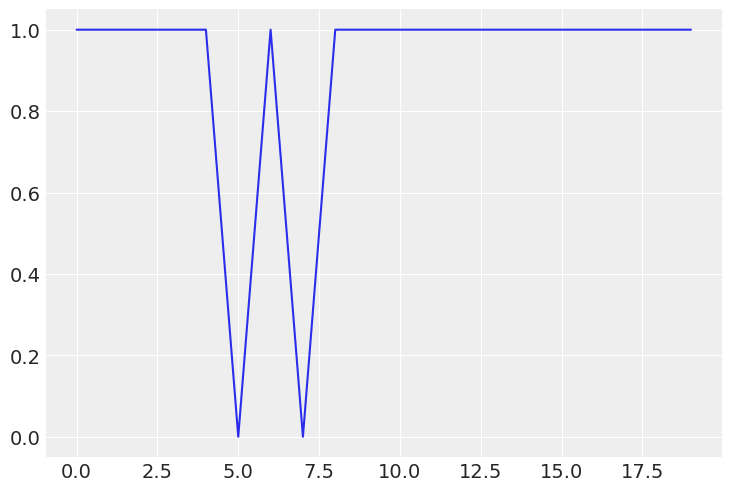

In [139]:
Y = stats.bernoulli(0.7).rvs(20)
successes = sum(Y)
n = len(Y)
plt.plot(Y)

C:\Users\aniru\AppData\Local\Temp\ipykernel_12224\1191880.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  trace["θ"][iter] = θ


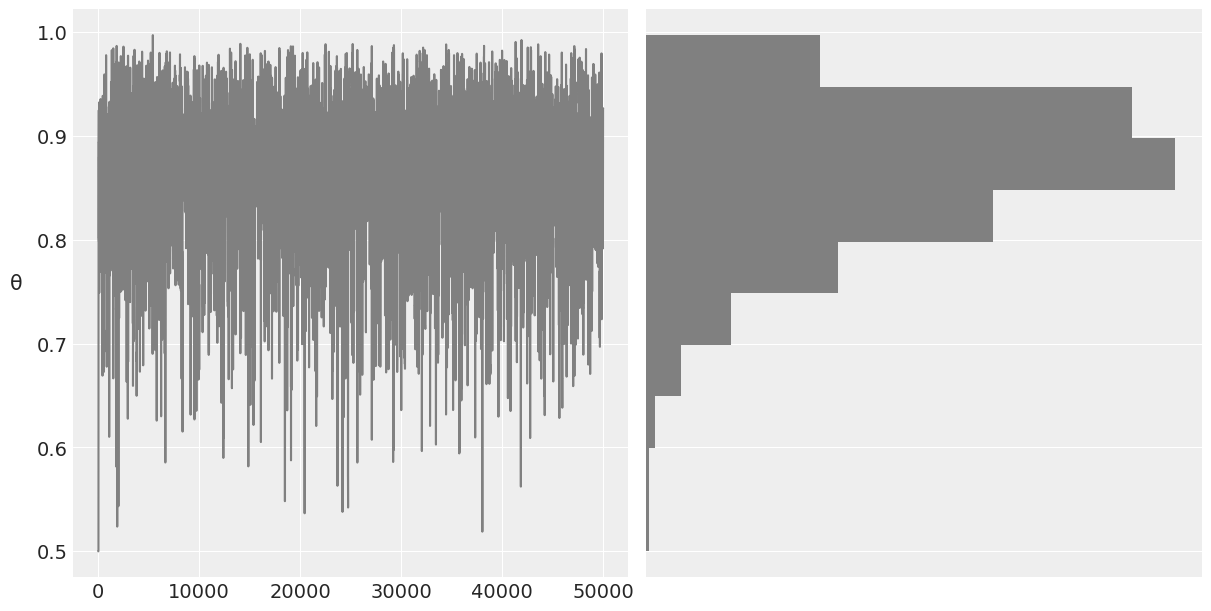

In [148]:
n_iters = 50000
can_sd = 1
α = β = 1
θ = 0.5
trace = {"θ":np.zeros(n_iters)}
p2 = post(θ, Y, α, β)

for iter in range(n_iters):
    θ_can = stats.norm(θ, can_sd).rvs(1)
    p1 = post(θ_can, Y, α, β)
    pa = p1 / p2

    if pa > stats.uniform(0, 1).rvs(1):
        θ = θ_can
        p2 = p1

    trace["θ"][iter] = θ

_, axes = plt.subplots(1, 2, sharey = True, figsize = (12, 6))
axes[0].plot(trace['θ'], '0.5')
axes[0].set_ylabel('θ', rotation = 0, labelpad = 15)
axes[1].hist(trace['θ'], color = '0.5', orientation = 'horizontal', density = True)
axes[1].set_xticks([])
plt.show()

<Axes: title={'center': 'θ'}>

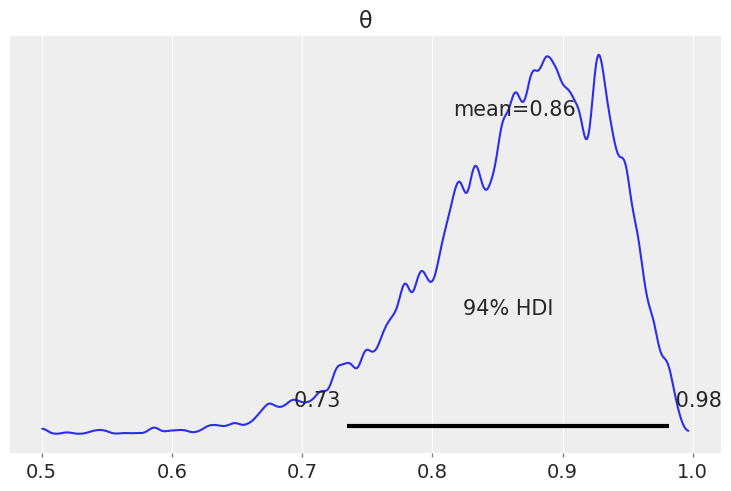

In [149]:
az.plot_posterior(trace)

In [67]:
az.summary(trace, kind = "stats", round_to = 2)

,mean,sd,hdi_3%,hdi_97%
θ,0.76,0.09,0.59,0.91


In [68]:
def mcmc(can_sd=0.05):
    n_iters = 1000
    α = β = 1
    θ = 0.5
    trace = {"θ":np.zeros(n_iters)}
    p2 = post(θ, Y, α, β)
    for iter in range (n_iters):
        θ_can = stats.norm(θ, can_sd).rvs(1)
        p1 = post(θ_can, Y, α, β)
        pa = p1 / p2
        if pa > stats.uniform(0, 1).rvs(1):
            θ = θ_can
            p2 = p1
        trace["θ"][ iter ] = θ
    return trace

In [69]:
traces = []
sds = [0.05, 0.001, 1]
for can_sd in sds:
    traces.append(mcmc(can_sd))

C:\Users\aniru\AppData\Local\Temp\ipykernel_12224\3220199231.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  trace["θ"][ iter ] = θ


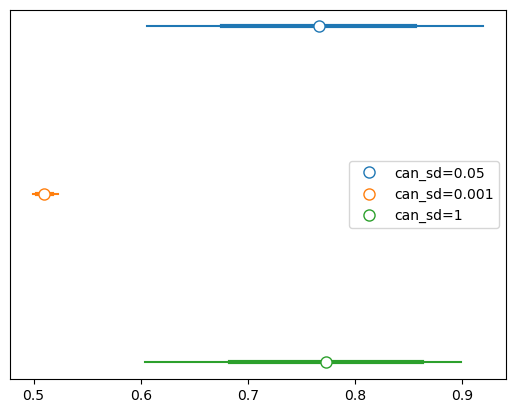

In [70]:
_, ax = plt.subplots(1)
for idx, trace in enumerate(traces):
    df = az.summary(trace, kind="stats")
    mean = df["mean"]
    sd = df["sd"]
    hdi = df.iloc[0,2:].values
    ax.plot([hdi[0], hdi[1]], [-idx, -idx],  f"C{idx}-")
    ax.plot([mean-sd, mean+sd], [-idx, -idx],  f"C{idx}-", lw=3)
    ax.plot(mean, -idx, "o", ms=8, mec=f"C{idx}", mfc="w", label=f"can_sd={sds[idx]}")
ax.set_yticks([]);
plt.legend();

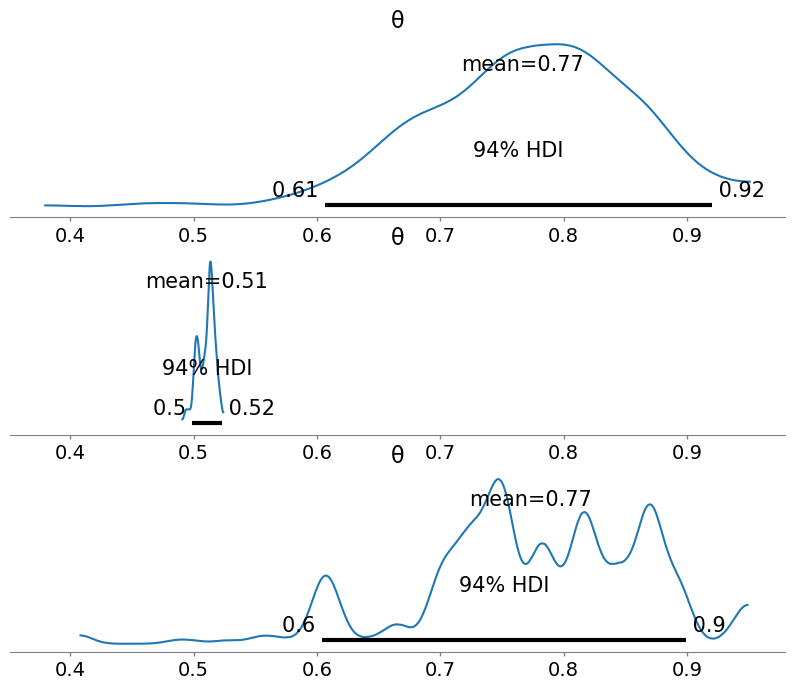

In [71]:
_, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
for trace, ax in zip(traces, axes.ravel()):
    az.plot_posterior(trace, ax=ax)

#### 1E11

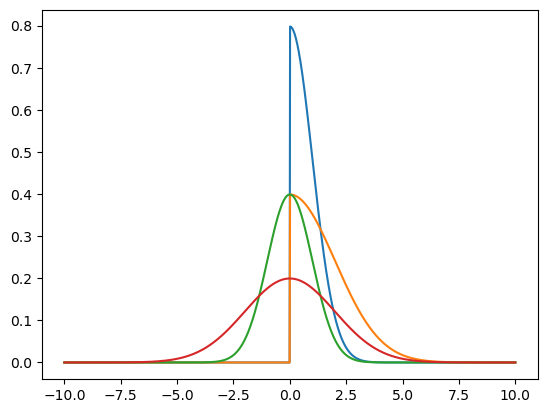

In [72]:
arr = np.linspace(-10, 10, 1000)
p = stats.halfnorm(0, 1).pdf(arr)
q = stats.halfnorm(0, 2).pdf(arr)
r = stats.norm(0, 1).pdf(arr)
s = stats.norm(0, 2).pdf(arr)
plt.plot(arr, p)
plt.plot(arr, q)
plt.plot(arr, r)
plt.plot(arr, s)
plt.show()

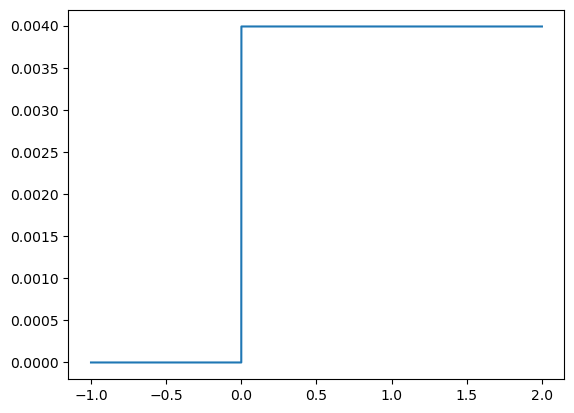

In [73]:
arr = np.linspace(-1, 2, 10000)
p = stats.halfnorm(0, 200).pdf(arr)
plt.plot(arr, p)
plt.show()

#### 1E12

In [82]:
def posterior_grid(grid = 10, a = 1, b = 1, heads = 6, trials = 9):
    grid = np.linspace(0, 1, grid)
    prior = stats.beta(a, b).pdf(grid)
    likelihood = stats.binom.pmf(heads, trials, grid)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    
    _, ax = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (16, 4))
    ax[0].set_title(f"heads = {heads}\ntrials = {trials}")
    
    for i, (e, e_n) in enumerate(zip(
        [prior, likelihood, posterior],
        ["prior", "likelihood", "posterior"])):
        # ax[i].set_yticks([])
        ax[i].plot(grid, e, "o-", label = e_n)
        ax[i].legend(fontsize = 14)
        
        # Add a vertical red line at the maximum of the curve
        max_idx = np.argmax(e)
        max_x = grid[max_idx]
        max_y = e[max_idx]
        ax[i].axvline(max_x, color='red', linestyle='--')
        
        # Display the x-coordinate of the maximum
        ax[i].text(max_x, max_y, f'{max_x:.2f}', color='green', ha='right')

interact(posterior_grid,
         grid = ipyw.IntSlider(min = 2, max = 100, step = 1, value = 15),
         a = ipyw.FloatSlider(min = 1, max = 7, step = 1, value = 1),
         b = ipyw.FloatSlider(min = 1, max = 7, step = 1, value = 1),
         heads = ipyw.IntSlider(min = 0, max = 20, step = 1, value = 6),
         trials = ipyw.IntSlider(min = 0, max = 20, step = 1, value = 9))

interactive(children=(IntSlider(value=15, description='grid', min=2), FloatSlider(value=1.0, description='a', …

<function __main__.posterior_grid(grid=10, a=1, b=1, heads=6, trials=9)>

In [83]:
# changing grid changes the "resolution" of the curves. the more the points on the grid, the smoother the curves will be.

# changing the ratio changes the peak of the likelihood and of the posterior. the likelihood's peak is on heads/trials, while for the posterior, though its peak
# shifts left and right parallel to the likelihood's peak, its peak is determined by the product of the prior and the likelihood, usually between the prior and
# likelihood peaks. not the average, but between them, a compromise between the MLE and the prior. updating the prior.

# changing a and b obviously change the shape of the prior, and also the shape of the likelihood and the posterior. for the posterior, the major change happens in
# the location of the peak. for the likelihood, the shape changes because the common plot's y axis scaling changes due to the prior being tweaked.

#### 1M18

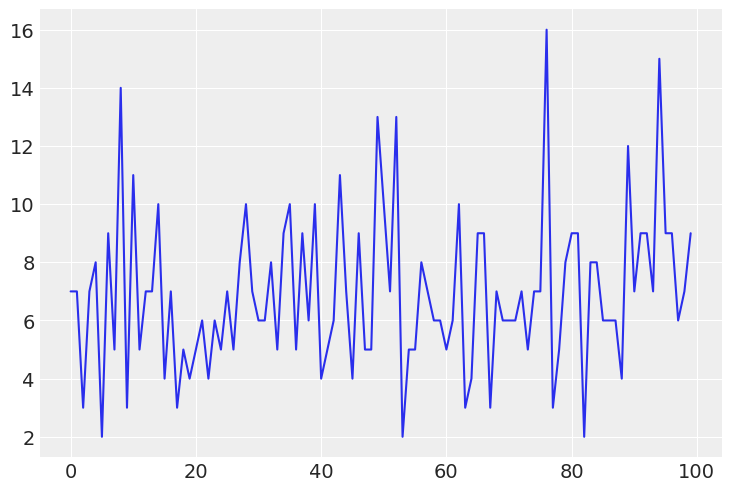

In [249]:
Y = stats.poisson(7).rvs(100)
successes = sum(Y)
n = len(Y)
plt.plot(Y)

In [250]:
Y

array([ 7,  7,  3,  7,  8,  2,  9,  5, 14,  3, 11,  5,  7,  7, 10,  4,  7,
        3,  5,  4,  5,  6,  4,  6,  5,  7,  5,  8, 10,  7,  6,  6,  8,  5,
        9, 10,  5,  9,  6, 10,  4,  5,  6, 11,  7,  4,  9,  5,  5, 13, 10,
        7, 13,  2,  5,  5,  8,  7,  6,  6,  5,  6, 10,  3,  4,  9,  9,  3,
        7,  6,  6,  6,  7,  5,  7,  7, 16,  3,  5,  8,  9,  9,  2,  8,  8,
        6,  6,  6,  4, 12,  7,  9,  9,  7, 15,  9,  9,  6,  7,  9],
      dtype=int64)

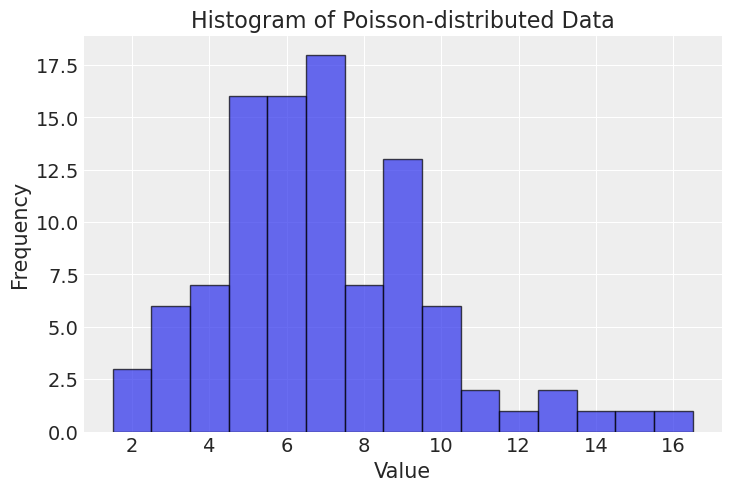

In [251]:
# Plot the histogram
# plt.figure(figsize=(10, 6))
plt.hist(Y, bins=np.arange(Y.min(), Y.max() + 2) - 0.5, edgecolor='black', alpha=0.7)
plt.title('Histogram of Poisson-distributed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

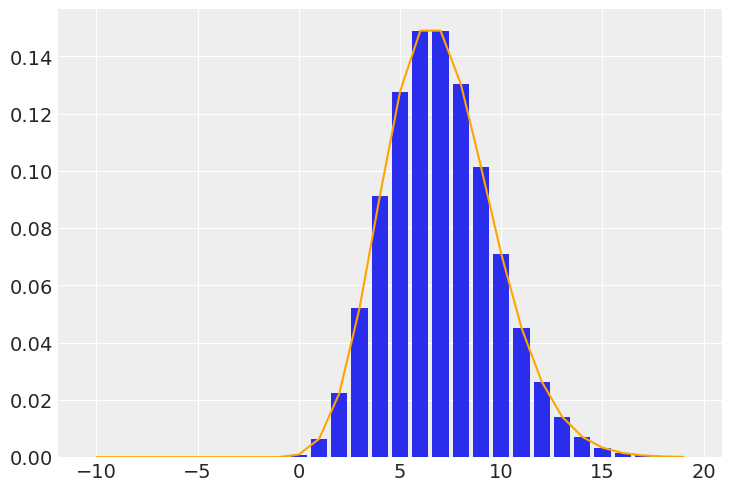

In [252]:
arr = np.arange(-10, 20)
p = stats.poisson(7).pmf(arr)
plt.bar(arr, p)
plt.plot(arr, p, color = "orange")
plt.show()

In [253]:
def gamma_distribution(a=1, b=1):
    x = np.linspace(0, 20, 10000)
    pdf = stats.gamma.pdf(x, a, scale=1/b)
    mode = (a - 1) / b
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, pdf, 'b-', label=f'Gamma(a={a:.1f}, b={b:.1f})')
    plt.axvline(mode, color='red', linestyle='--', label=f'Mode = {(a - 1)/b:.2f}')
    plt.title(f'Gamma Distribution (a={a:.1f}, b={b:.1f})')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

interact(gamma_distribution,
         a=ipyw.FloatSlider(min=0.1, max=20, step=0.1, value=1),
         b=ipyw.FloatSlider(min=0.1, max=20, step=0.1, value=1))

interactive(children=(FloatSlider(value=1.0, description='a', max=20.0, min=0.1), FloatSlider(value=1.0, descr…

<function __main__.gamma_distribution(a=1, b=1)>

In [254]:
# th = θ, a = α, b = β
def post(k, Y, a = 1, b = 1):
    if 0 < k:
        prior = stats.gamma(a, b).pdf(k) # value of prior at given lambda
        like = stats.poisson(k).pmf(Y).prod() # likelihood calculated using given lambda and the given data
        prob = like * prior # posterior value for that lambda
    else:
        prob = -np.inf # saying fuck off?
        # yeah if theta ever goes outside the support of the gammadistribution ([0, inf]) then the ratio will be -inf, and so it won't get
        # accepted as the next lambda.
    return prob

In [262]:
n_iters = 20000 # no. of samples of mcmc
can_sd = 1 # proposal distribution sd
a = 20
b = 1.80 # prior parameters
k = 5 # starting lambda for mcmc, our prior is on lambda
trace = {"k": np.zeros(n_iters)}
p2 = post(k, Y, a, b) # posterior value using theta = 0.5

for iter in range(n_iters): # mcmc samples
    k_can = stats.norm(k, can_sd).rvs(1)[0] # the new lambda is sampled from the proposal distribution
    p1 = post(k_can, Y, a, b) # the posterior value for this lambda
    pa = p1 / p2 # ratio of two posteriors
    if pa > stats.uniform(0, 1).rvs(1)[0]: # if pa > 1, then it gets accepted anyway. otherwise, apply the uniform selection thing.
        k = k_can
        p2 = p1
    trace["k"][iter] = k

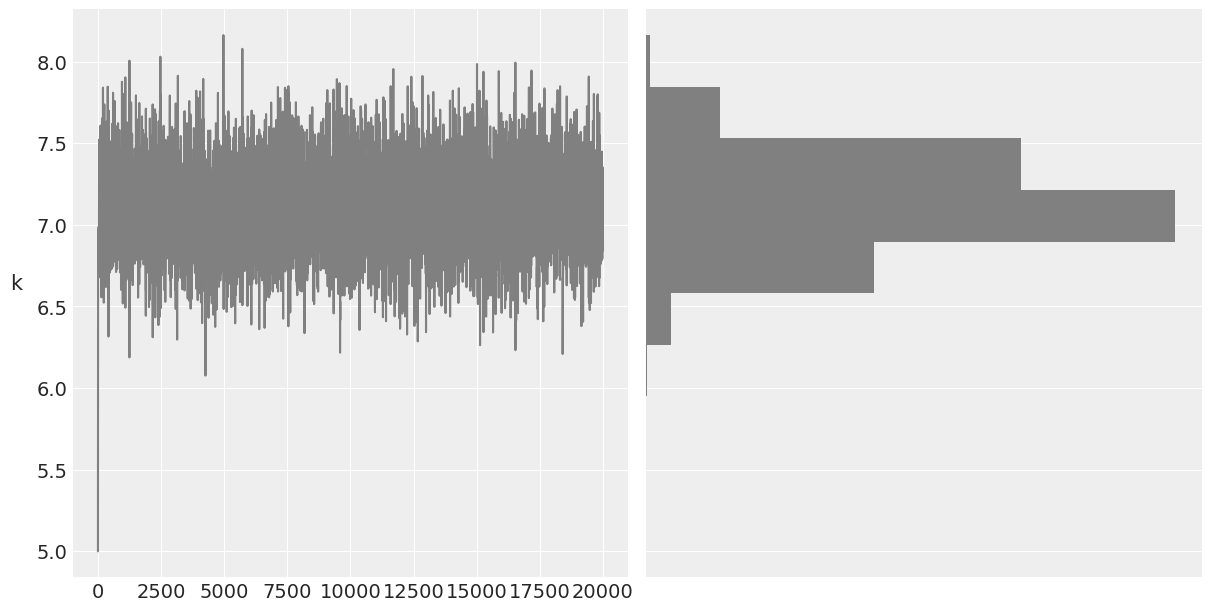

In [263]:
_, axes = plt.subplots(1, 2, sharey = True, figsize = (12, 6))
axes[0].plot(trace['k'], '0.5')
axes[0].set_ylabel('k', rotation = 0, labelpad = 15)
axes[1].hist(trace['k'], color = '0.5', orientation = 'horizontal', density = True)
axes[1].set_xticks([])
plt.show()

In [264]:
az.summary(trace, kind = "stats", round_to = 2)

,mean,sd,hdi_3%,hdi_97%
k,7.12,0.26,6.62,7.6


<Axes: title={'center': 'k'}>

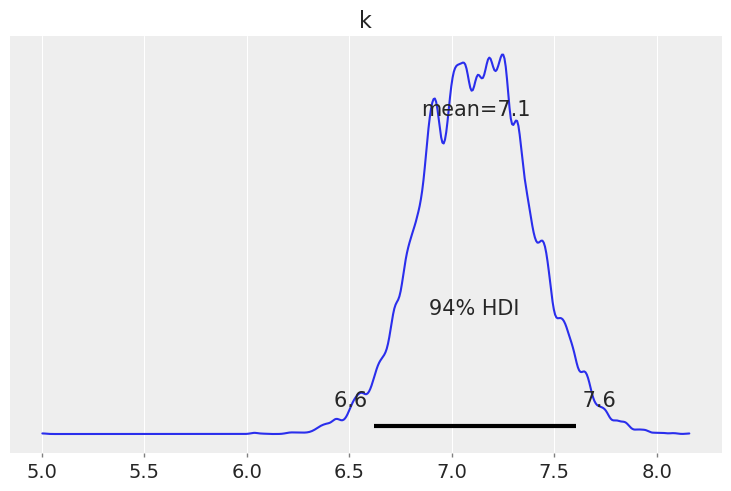

In [265]:
az.plot_posterior(trace)

In [266]:
Y

array([ 7,  7,  3,  7,  8,  2,  9,  5, 14,  3, 11,  5,  7,  7, 10,  4,  7,
        3,  5,  4,  5,  6,  4,  6,  5,  7,  5,  8, 10,  7,  6,  6,  8,  5,
        9, 10,  5,  9,  6, 10,  4,  5,  6, 11,  7,  4,  9,  5,  5, 13, 10,
        7, 13,  2,  5,  5,  8,  7,  6,  6,  5,  6, 10,  3,  4,  9,  9,  3,
        7,  6,  6,  6,  7,  5,  7,  7, 16,  3,  5,  8,  9,  9,  2,  8,  8,
        6,  6,  6,  4, 12,  7,  9,  9,  7, 15,  9,  9,  6,  7,  9],
      dtype=int64)

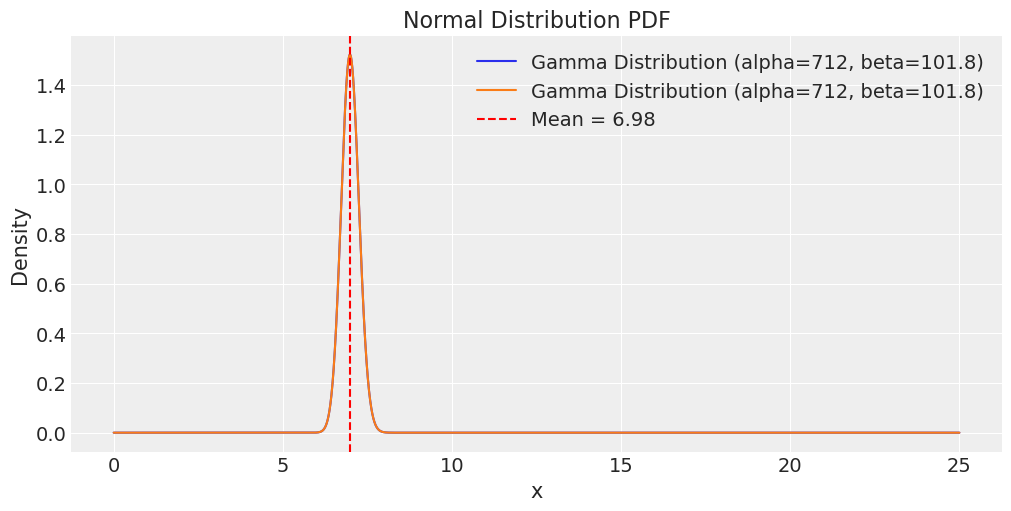

In [267]:
# Parameters for the Normal distribution
alpha = a + successes
beta = b + n

# Generate values from -3*sigma to 3*sigma
# x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
x = np.linspace(0, 25, 50000)
pdf1 = stats.gamma.pdf(x, alpha, scale = 1/beta)
pdf2 = stats.gamma(a = alpha, scale = 1/beta).pdf(x)
# it just works

# (alpha - 1)/beta
# Plot the PDF
plt.figure(figsize=(10, 5))
plt.plot(x, pdf1, label=f'Gamma Distribution (alpha={alpha}, beta={beta})')
plt.plot(x, pdf2, label=f'Gamma Distribution (alpha={alpha}, beta={beta})')
plt.axvline((alpha - 1)/beta, color='red', linestyle='--', label=f'Mean = {(alpha - 1)/beta:.2f}')
plt.title('Normal Distribution PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

In [269]:
# more the iterations: better the estimate (NOT ALWAYS! you have to get your starting parameters right)
# more the number of observations, closer the estimate will be to your final outcome
# starting parameters inform your beliefs. the closer they are to the actual parameter, the better the estimate. duh.
# if the mode is below the actual parameter, it moves rightward and the peak concentrates. if mode is above, it moves down.

In [272]:
# Declare a model in PyMC3

with pm.Model() as model:
    # Specify the prior distribution of unknown parameters
    σ = pm.HalfNormal("σ", sigma=50)
    μ = pm.Normal("μ", mu = 150, sigma=30)

    # Specify the likelihood distribution.
    # Because we are not conditioned on data we can pass an empty list to the "observed" argument
    y_obs = pm.TruncatedNormal("heights", mu=μ, sigma=σ, lower=0, observed=[])
    
    # Sample from the posterior distribution
    prior_predictive = pm.sample_prior_predictive()

Sampling: [heights, μ, σ]


In [274]:
az.plot_ppc(prior_predictive, var_names=["heights"]);

TypeError: `data` argument must have the group "posterior_predictive" for ppcplot

In [275]:
# Assuming you have a model defined as 'model'
with model:
    # Sample from the posterior distribution
    trace = pm.sample()

    # Sample prior predictive
    prior_predictive = pm.sample_prior_predictive()

# Convert the trace and prior predictive samples to InferenceData
idata = az.(trace=trace, prior=prior_predictive)

# Plot posterior
az.plot_posterior(idata, var_names=["heights"])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 57 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
Sampling: [heights, μ, σ]


AttributeError: module 'arviz' has no attribute 'from_pymc3'